# importing the libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# importing the data

In [129]:
data = pd.read_csv('values.csv')

In [130]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Basics checks

In [131]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [132]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [133]:
data.describe() # to describe the numerical values

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [134]:
data.describe(include=['O']) # to describe the categorical values

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

# EDA

# Univariate Analysis

In [136]:
# !pip install sweetviz

In [137]:
'''import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()'''

'import sweetviz as sv#importing sweetviz library \nmy_report = sv.analyze(data)#syntax to use sweetviz\nmy_report.show_html()'

## Insightes from univariate analysis

* People having slope_of_peak_exercise_st_segment 1 and 2 contribute towards 94% of the data.
* people in thal containing normal and reversed defect contribute 95% of the data.
* resting blood pressure of the majority of the group lies in between 120 - 140.
* people with chest pain 4 are high in count 46%.
* people having 0 number of major vessel are high in number 59%.
* people with blood sugar < 120 are high is count 84%, rest have blood sugar > 120.
* resting EKG results people with 2 and 0 are approx equal.
* majority of the people have cholesterol between 200 - 300 mg per dl.
* people with no depression are the highest with 31%.
* people with age between 44 - 58 are the highest.
* max heart rate achieved lies between 142 - 162.

## Bivariate Analysis

### checking the variation of the variable with the targer variable

In [138]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [139]:
data.shape

(180, 15)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [141]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [142]:
# Assuming 'data' is your DataFrame containing the column 'patient_id'
data.drop(columns=['patient_id'], inplace=True)

In [143]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [144]:
data.shape

(180, 14)

In [145]:
data.groupby('slope_of_peak_exercise_st_segment')['heart_disease_present'].sum()

slope_of_peak_exercise_st_segment
1    25
2    47
3     8
Name: heart_disease_present, dtype: int64

In [146]:
data.groupby('thal')['heart_disease_present'].sum()

thal
fixed_defect          4
normal               20
reversible_defect    56
Name: heart_disease_present, dtype: int64

In [147]:
data.groupby('chest_pain_type')['heart_disease_present'].sum()

chest_pain_type
1     4
2     4
3    13
4    59
Name: heart_disease_present, dtype: int64

In [148]:
data.groupby('num_major_vessels')['heart_disease_present'].sum()

num_major_vessels
0    29
1    22
2    17
3    12
Name: heart_disease_present, dtype: int64

In [149]:
data.groupby('fasting_blood_sugar_gt_120_mg_per_dl')['heart_disease_present'].sum()

fasting_blood_sugar_gt_120_mg_per_dl
0    67
1    13
Name: heart_disease_present, dtype: int64

In [150]:
data.groupby('resting_ekg_results')['heart_disease_present'].sum()

resting_ekg_results
0    31
1     1
2    48
Name: heart_disease_present, dtype: int64

In [151]:
data.groupby('oldpeak_eq_st_depression')['heart_disease_present'].sum()

oldpeak_eq_st_depression
0.0    16
0.1     1
0.2     1
0.3     1
0.4     1
0.5     1
0.6     2
0.7     0
0.8     4
0.9     2
1.0     3
1.1     0
1.2     6
1.3     0
1.4     7
1.5     1
1.6     4
1.8     4
1.9     1
2.0     3
2.2     4
2.3     0
2.4     2
2.5     1
2.6     3
2.8     2
3.0     2
3.1     1
3.2     1
3.4     2
3.8     1
4.2     1
5.6     1
6.2     1
Name: heart_disease_present, dtype: int64

In [152]:
data.groupby('sex')['heart_disease_present'].sum()

sex
0    11
1    69
Name: heart_disease_present, dtype: int64

In [153]:
data.groupby('age')['heart_disease_present'].sum()

age
29    0
34    0
35    2
37    0
38    1
39    1
40    2
41    1
42    0
43    0
44    2
45    1
46    2
47    1
48    3
49    2
50    1
51    3
52    1
53    1
54    3
55    4
56    2
57    3
58    7
59    5
60    7
61    2
62    6
63    2
64    4
65    2
66    2
67    3
68    1
69    0
70    2
71    0
74    0
77    1
Name: heart_disease_present, dtype: int64

In [154]:
data.groupby('max_heart_rate_achieved')['heart_disease_present'].sum()

max_heart_rate_achieved
96     1
97     1
99     1
103    2
105    0
      ..
184    0
186    0
188    0
192    0
202    0
Name: heart_disease_present, Length: 73, dtype: int64

In [155]:
data.groupby('exercise_induced_angina')['heart_disease_present'].sum()

exercise_induced_angina
0    36
1    44
Name: heart_disease_present, dtype: int64

### Insights from Bivariate analysis
* heart attack is more prone to slope_of_peak_exercise_st_segment have 2
* in thal heart attack is more common in reversible defect
* chest pain 4 received more heart attacks
* number of major vessel is common for all
* people having blood sugar < 120 are more prune to getting heart attack
* resting_ekg_results having 2 is more prune to heart attack
* oldpeak_eq_st_depression have 0 get heart attack faster
* count of men having heart disease are more compared to women
* exercise doesn't describes heart attack

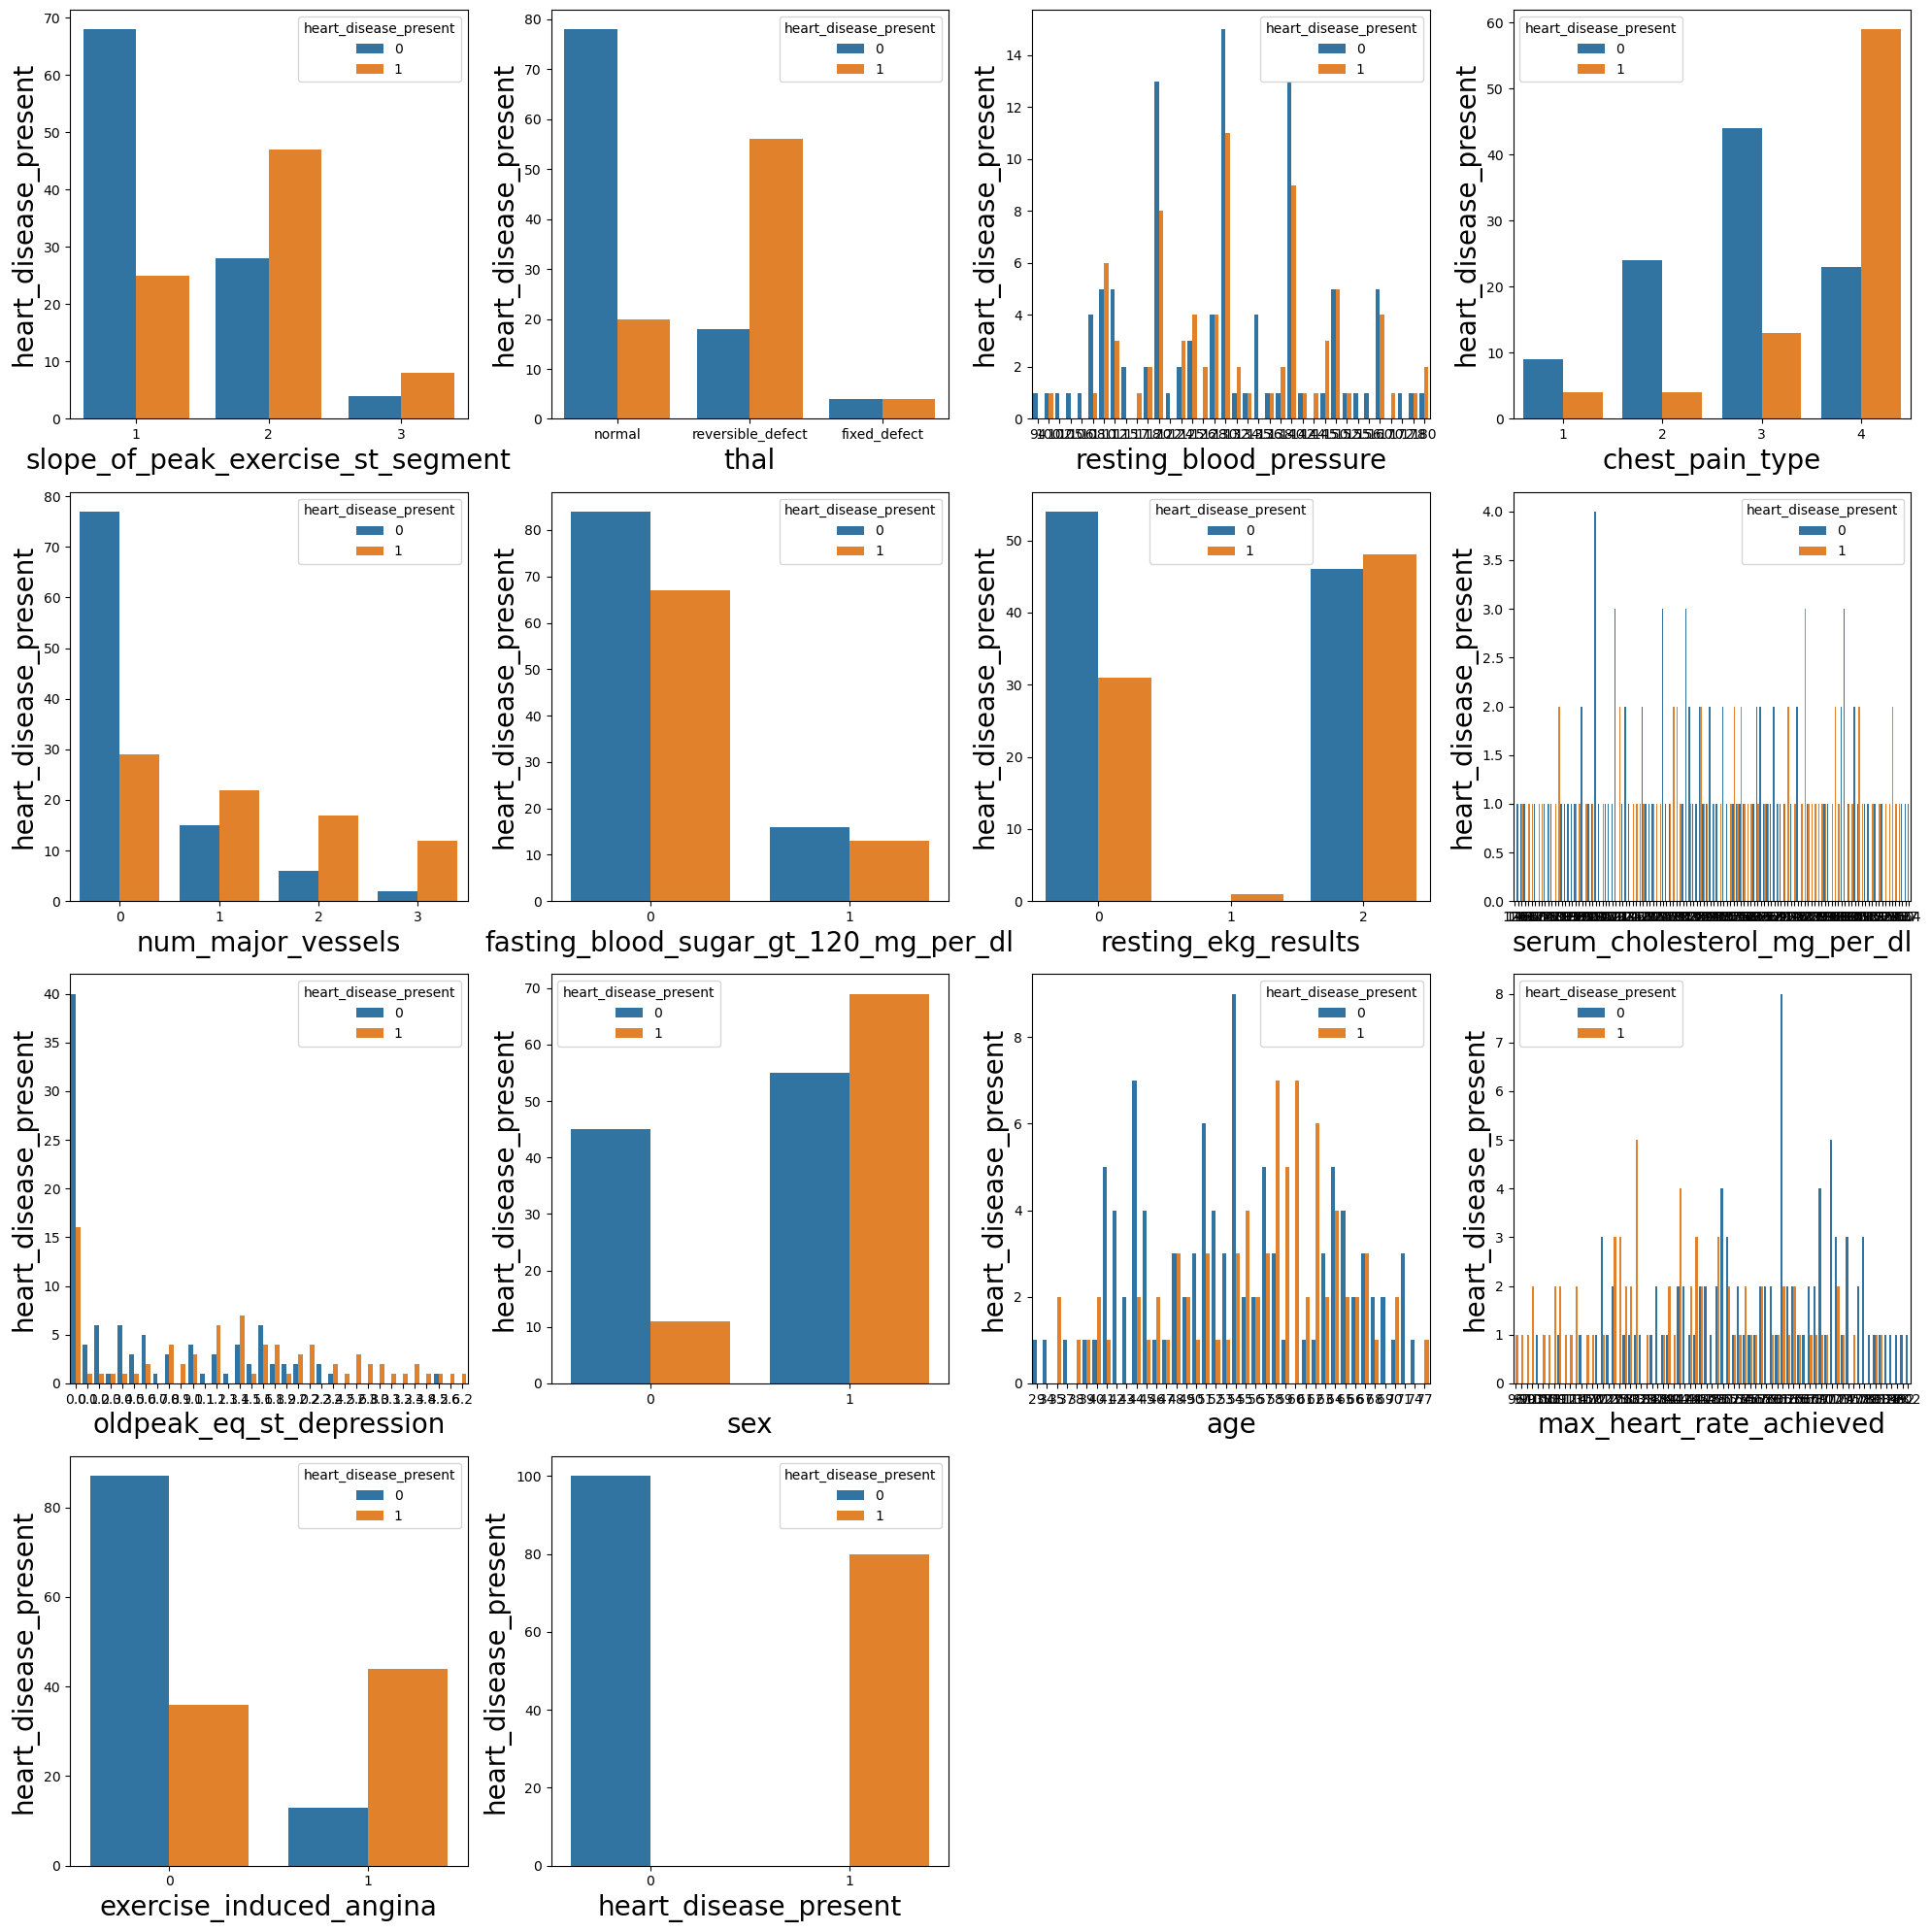

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'heart_disease_present' column to categorical data type
data['heart_disease_present'] = data['heart_disease_present'].astype(str)

# Iterate through each column and create a countplot
plotnumber = 1
plt.figure(figsize=(20, 20))
for column in data:
    ax = plt.subplot(4, 4, plotnumber)
    sns.countplot(x=data[column].dropna(axis=0), hue=data['heart_disease_present'])
    plt.xlabel(column, fontsize=20)
    plt.ylabel('heart_disease_present', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [157]:
print(data['heart_disease_present'].dtype)

object


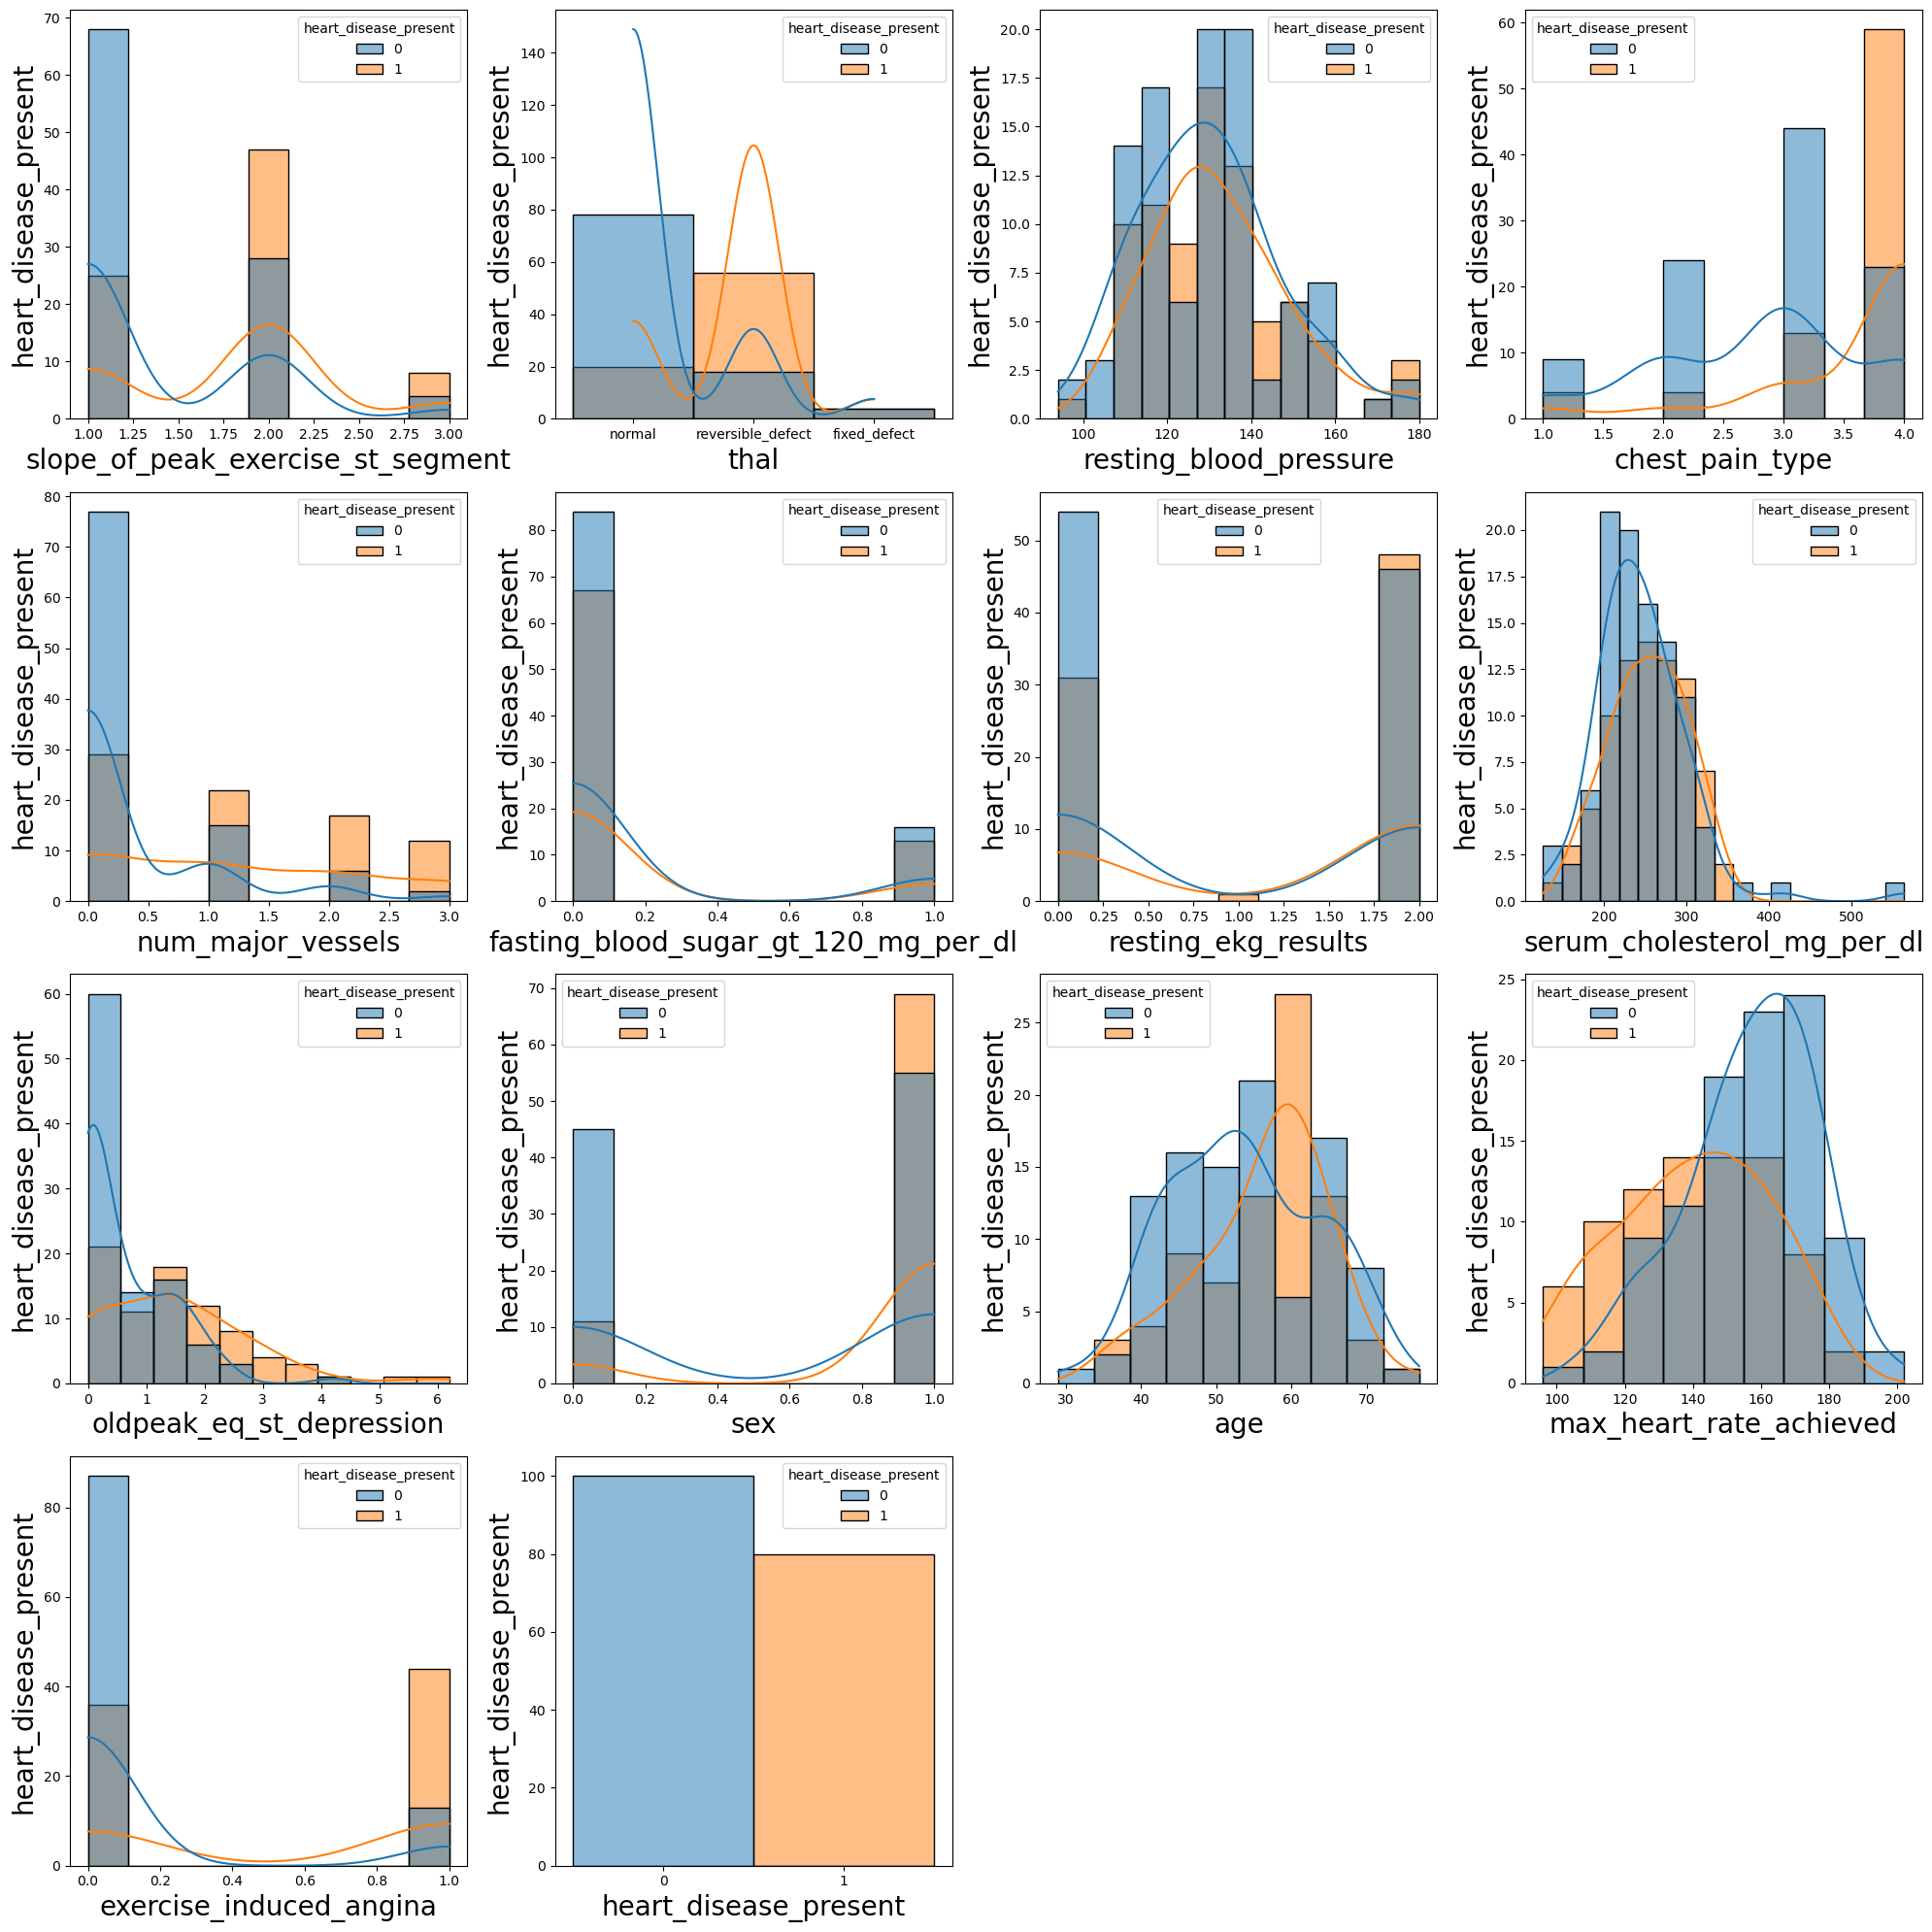

In [158]:
plotnumber = 1
plt.figure(figsize=(20, 20))
for column in data:
    ax = plt.subplot(4, 4, plotnumber)
    sns.histplot(x=data[column].dropna(axis=0), hue=data['heart_disease_present'], kde=True)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('heart_disease_present', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [159]:
data.heart_disease_present = data.heart_disease_present.astype(int)

In [160]:
data.heart_disease_present.dtype

dtype('int32')

In [161]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

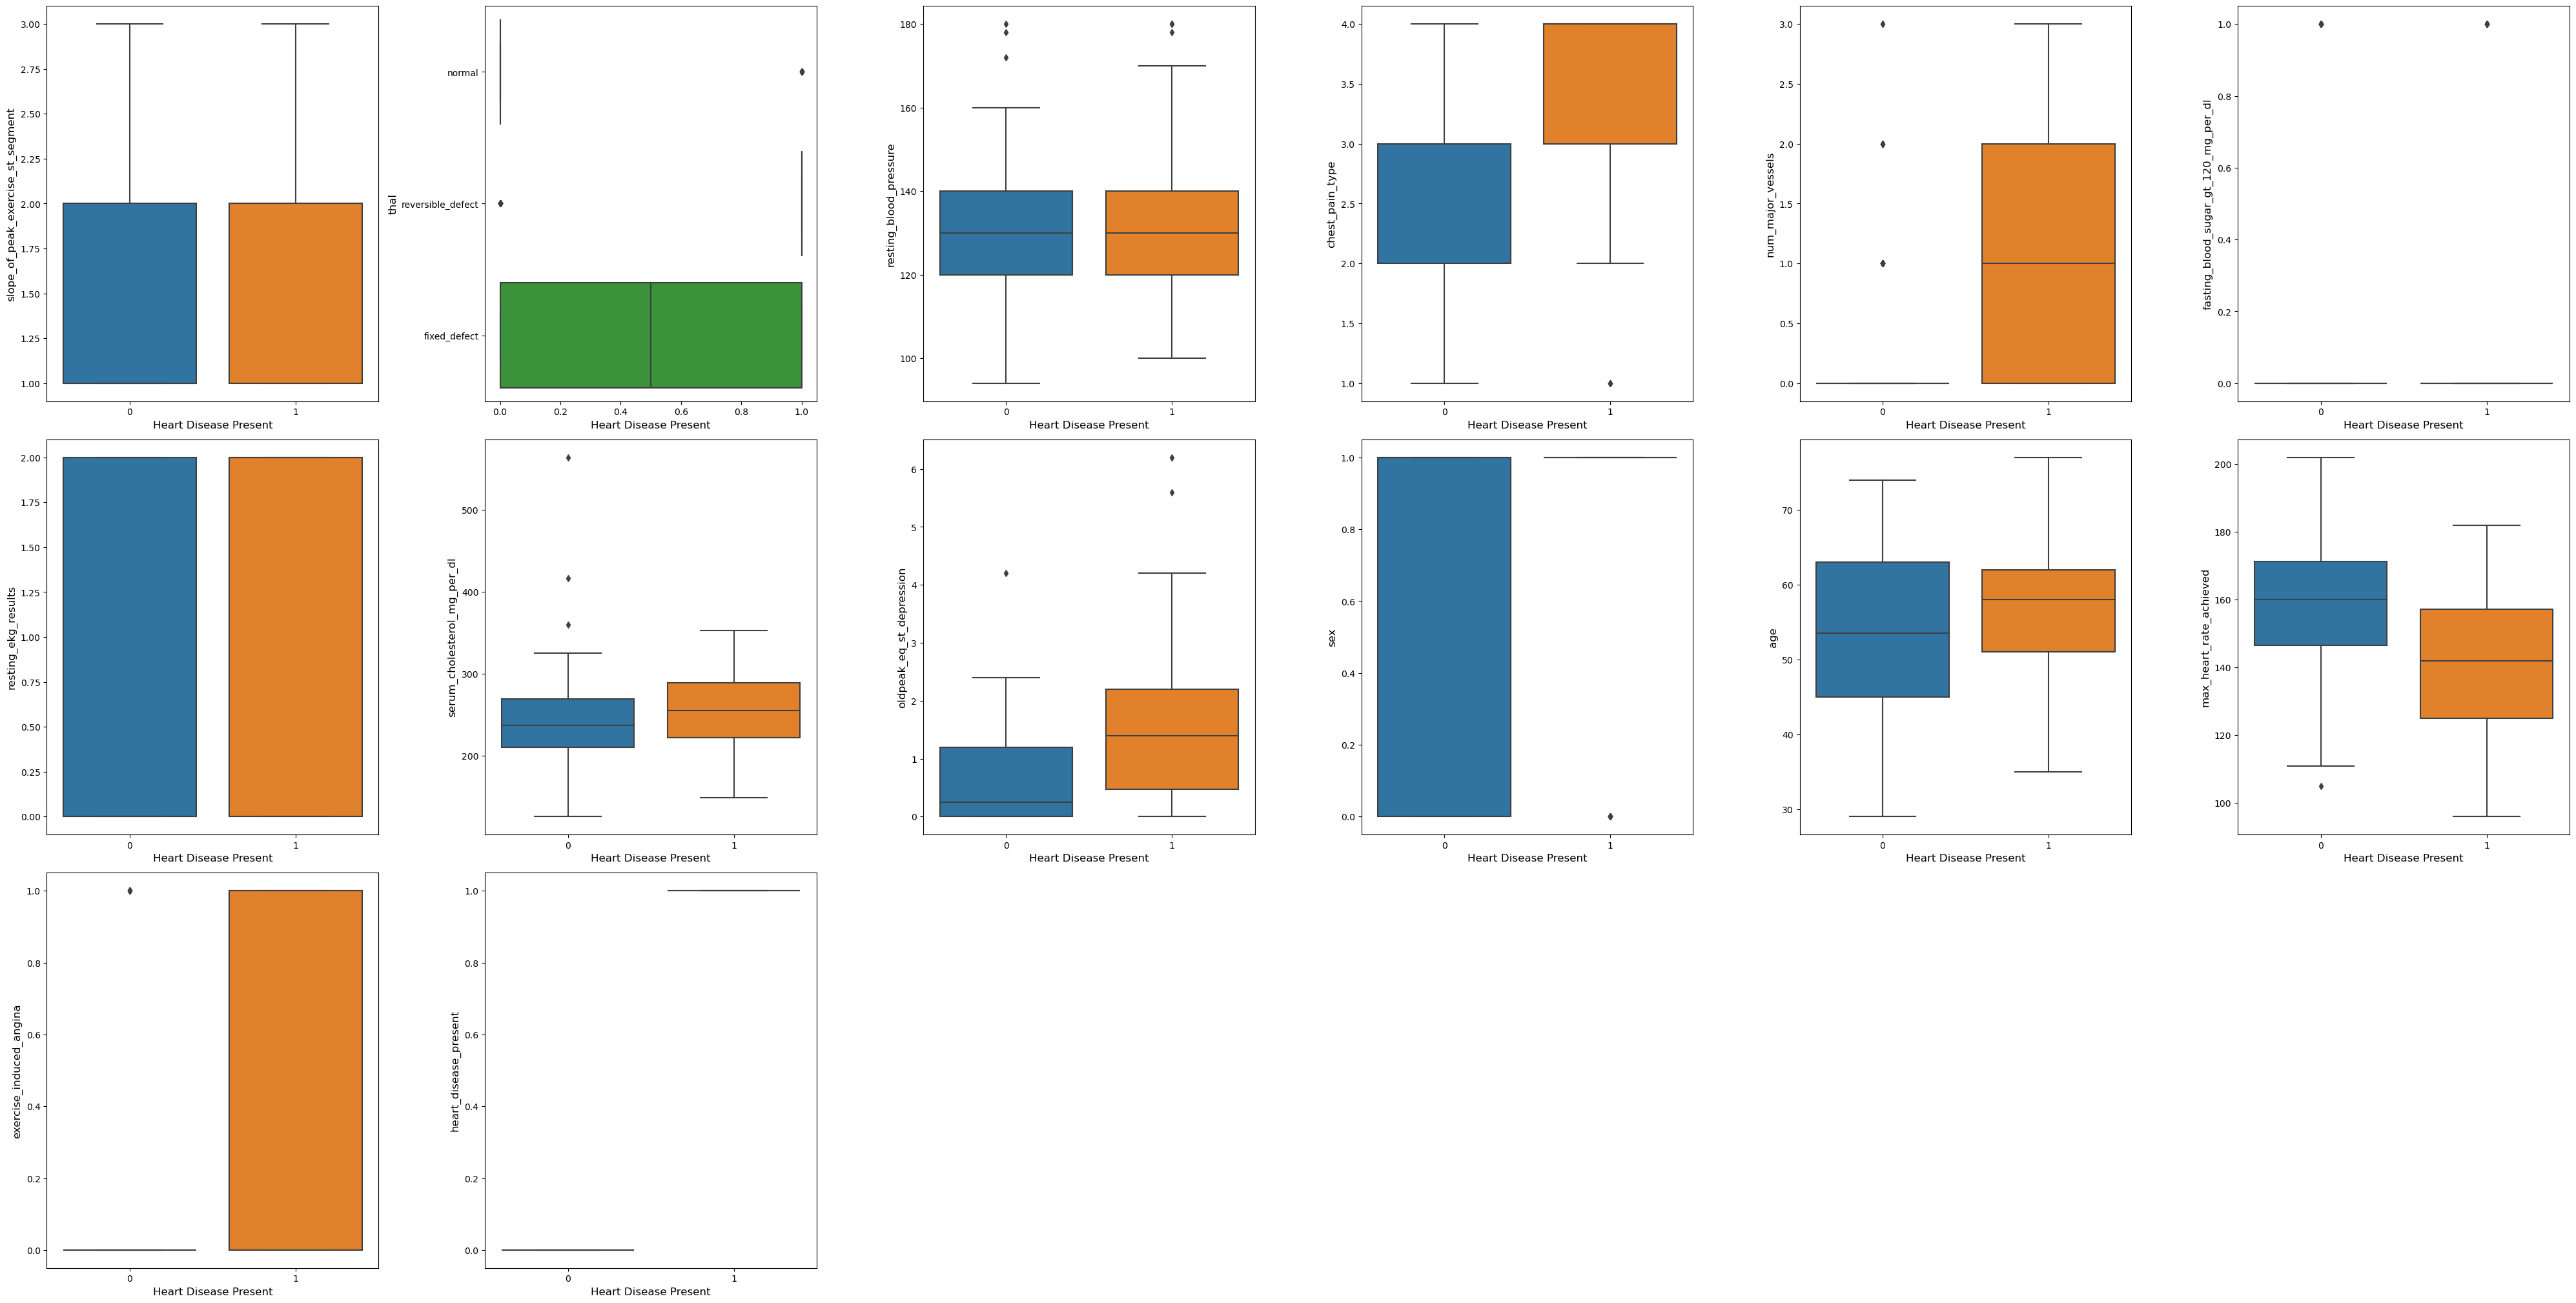

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set figure size
plt.figure(figsize=(40,40))

# Loop through columns and create boxplot
for i, column in enumerate(data.columns, 1):
    plt.subplot(6,6, i)
    sns.boxplot(x='heart_disease_present', y=column, data=data)
    plt.xlabel('Heart Disease Present', fontsize=12)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


# handling outliers

## resting_blood_pressure

In [163]:
q1 = data['resting_blood_pressure'].quantile(0.25)
q3 = data['resting_blood_pressure'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['resting_blood_pressure'] < q1 - 1.5 * iqr) | (data['resting_blood_pressure'] > q3 + 1.5 * iqr)]

outliers

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [164]:
data['resting_blood_pressure'].median()

130.0

In [165]:
# replace the outliers with median
data.loc[[4,33,72,75,113,176], 'resting_blood_pressure'] = 130.0

In [166]:
data.loc[[4,33,72,75,113,176]]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,130,1,0,0,2,270,4.2,1,59,145,0,0
33,1,normal,130,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,130,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,130,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,130,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,130,4,0,0,1,327,3.4,0,55,117,1,1


## serum_cholesterol_mg_per_dl

In [167]:
q1 = data['serum_cholesterol_mg_per_dl'].quantile(0.25)
q3 = data['serum_cholesterol_mg_per_dl'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['serum_cholesterol_mg_per_dl'] < q1 - 1.5 * iqr) | (data['serum_cholesterol_mg_per_dl'] > q3 + 1.5 * iqr)]

outliers

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


In [168]:
data['serum_cholesterol_mg_per_dl'].median()

245.5

In [169]:
# replace the outliers with median
data.loc[[43, 60], 'serum_cholesterol_mg_per_dl'] = 245.5

In [170]:
data.loc[[43, 60]]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,normal,140,3,1,1,2,245.5,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,245.5,1.6,0,67,160,0,0


## oldpeak_eq_st_depression

In [171]:
q1 = data['oldpeak_eq_st_depression'].quantile(0.25)
q3 = data['oldpeak_eq_st_depression'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['oldpeak_eq_st_depression'] < q1 - 1.5 * iqr) | (data['oldpeak_eq_st_depression'] > q3 + 1.5 * iqr)]

outliers

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,130,1,0,0,2,270.0,4.2,1,59,145,0,0
112,2,reversible_defect,140,4,3,0,0,298.0,4.2,1,51,122,1,1
140,3,reversible_defect,140,4,0,0,0,217.0,5.6,1,55,111,1,1
162,3,reversible_defect,160,4,3,0,2,164.0,6.2,0,62,145,0,1


In [172]:
data['oldpeak_eq_st_depression'].median()

0.8

In [173]:
# replace the outliers with median
data.loc[[4,112,140,162], 'oldpeak_eq_st_depression'] = 0.8

In [174]:
data.loc[[4,112,140,162]]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,130,1,0,0,2,270.0,0.8,1,59,145,0,0
112,2,reversible_defect,140,4,3,0,0,298.0,0.8,1,51,122,1,1
140,3,reversible_defect,140,4,0,0,0,217.0,0.8,1,55,111,1,1
162,3,reversible_defect,160,4,3,0,2,164.0,0.8,0,62,145,0,1


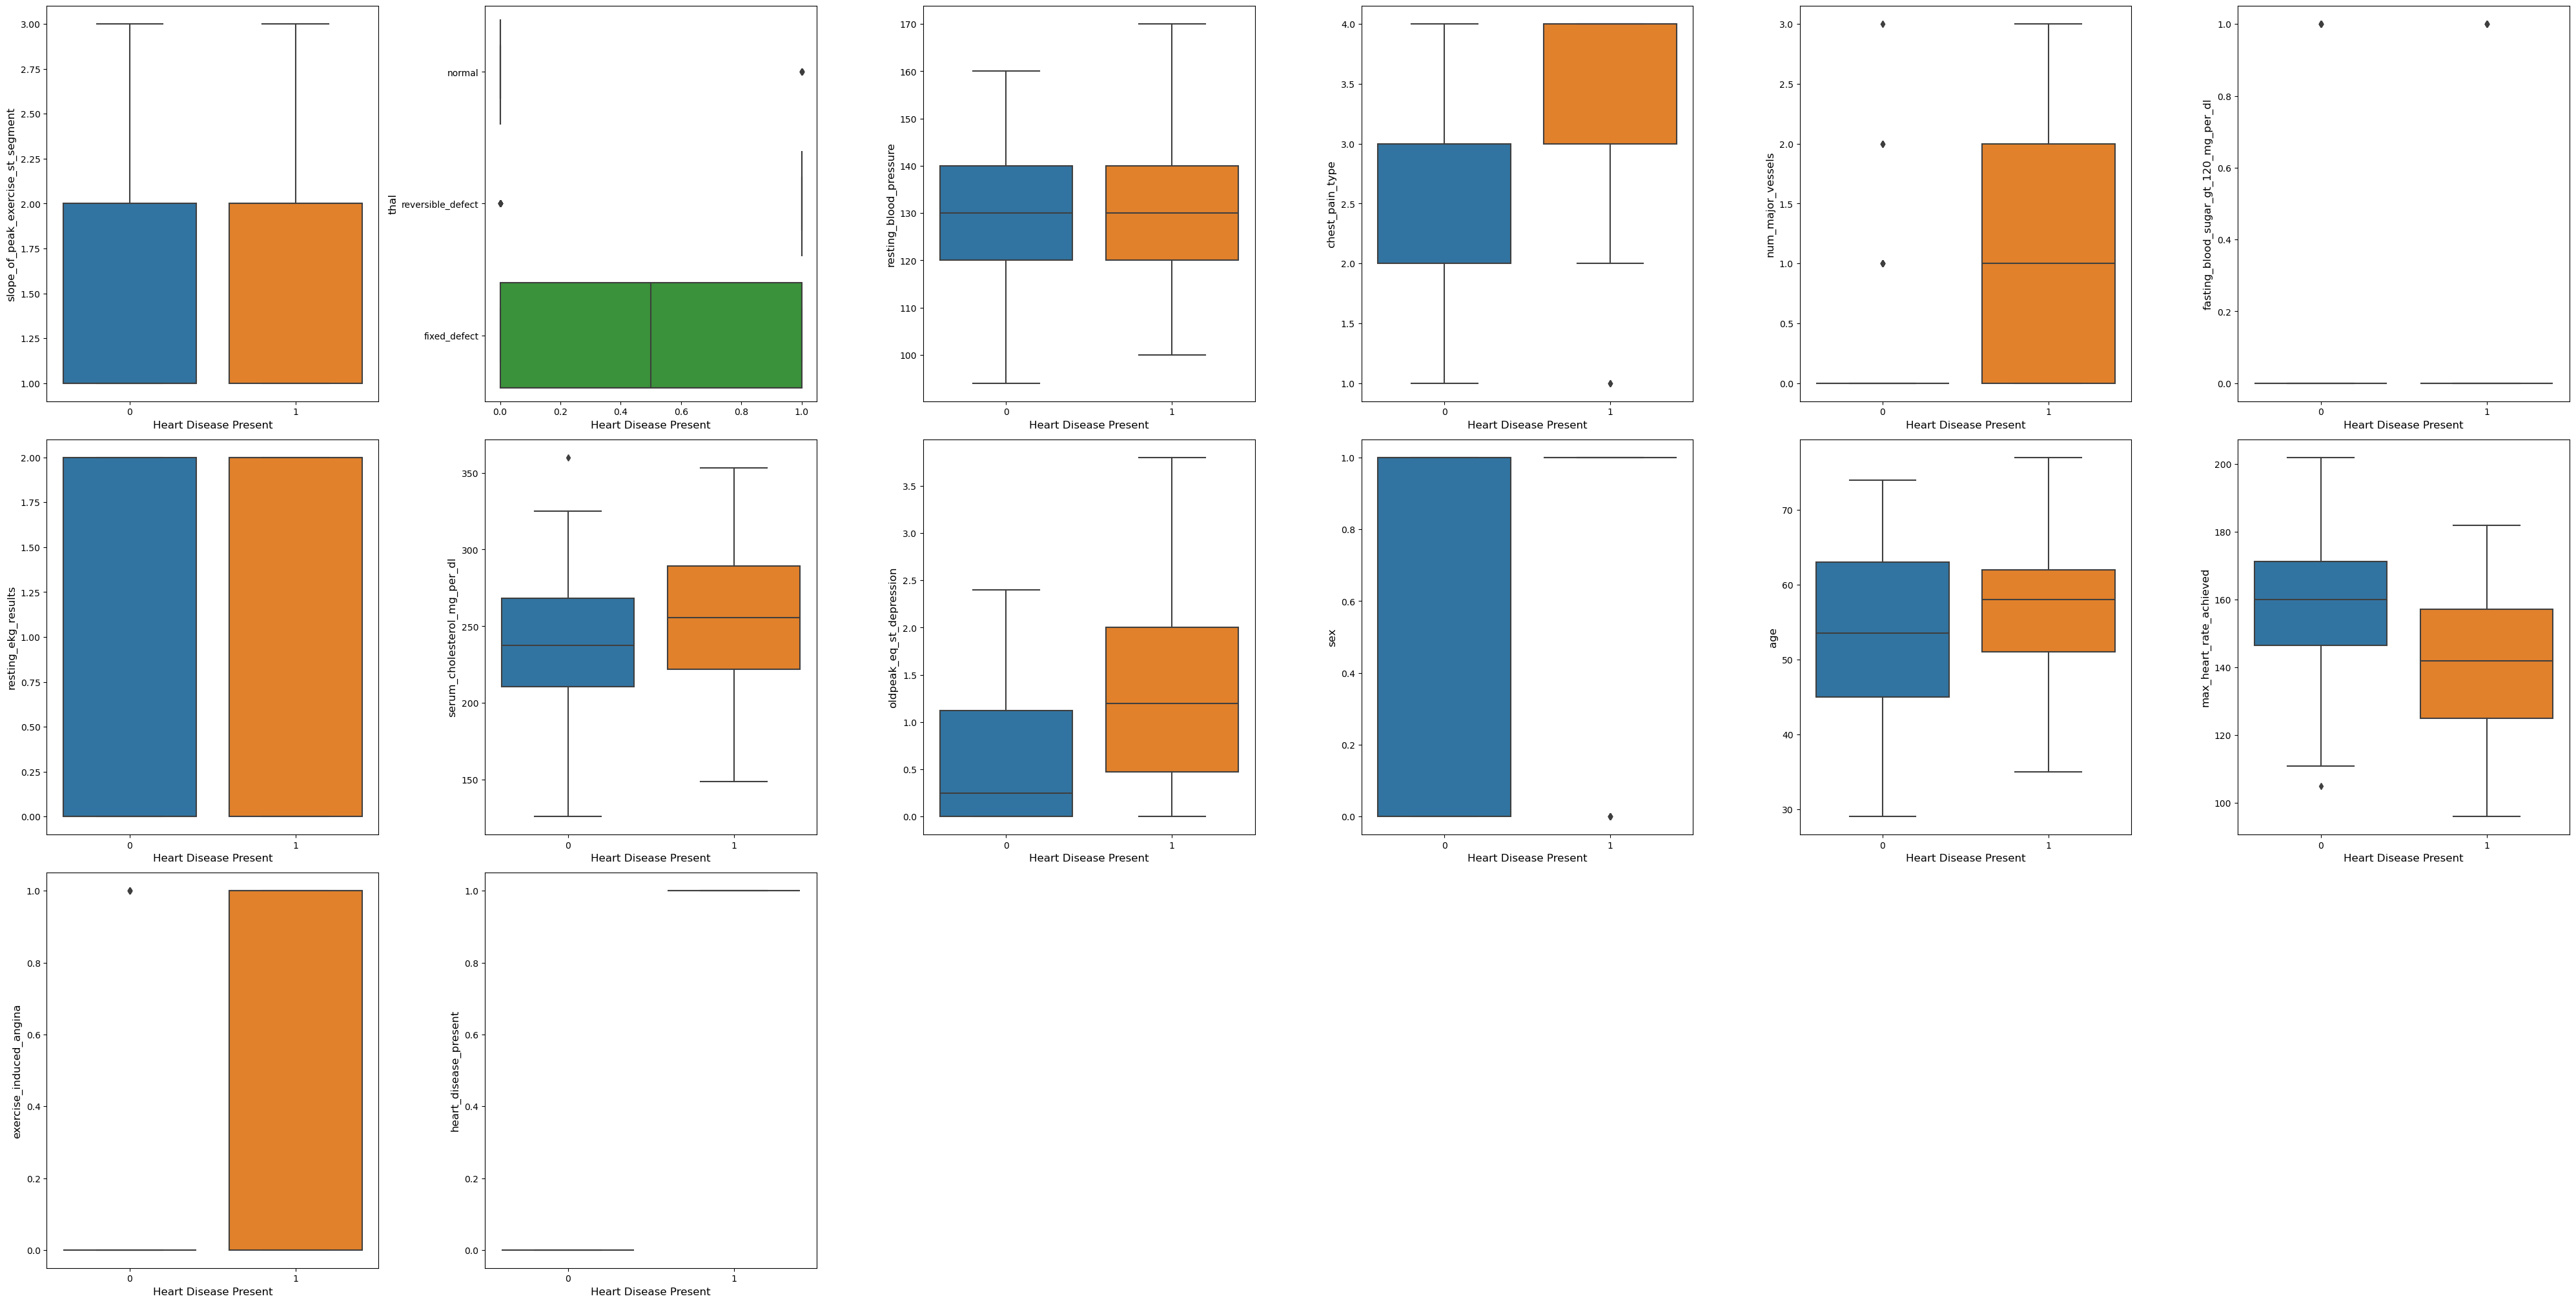

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set figure size
plt.figure(figsize=(40,40))

# Loop through columns and create boxplot
for i, column in enumerate(data.columns, 1):
    plt.subplot(6,6, i)
    sns.boxplot(x='heart_disease_present', y=column, data=data)
    plt.xlabel('Heart Disease Present', fontsize=12)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


# Data Preprocessing

In [176]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,reversible_defect,130,1,0,0,2,270.0,0.8,1,59,145,0,0


In [177]:
data.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [178]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [179]:
from sklearn.preprocessing import LabelEncoder

# Define label encoder
label_encoder = LabelEncoder()

# Define mapping
mapping = {'normal': 0, 'fixed_defect': 1, 'reversible_defect': 2}

# Apply label encoding to 'thal' column
data['thal'] = data['thal'].map(mapping)

# Display the modified 'thal' column
print(data['thal'])



0      0
1      0
2      0
3      2
4      2
      ..
175    2
176    0
177    2
178    0
179    0
Name: thal, Length: 180, dtype: int64


In [180]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0,0


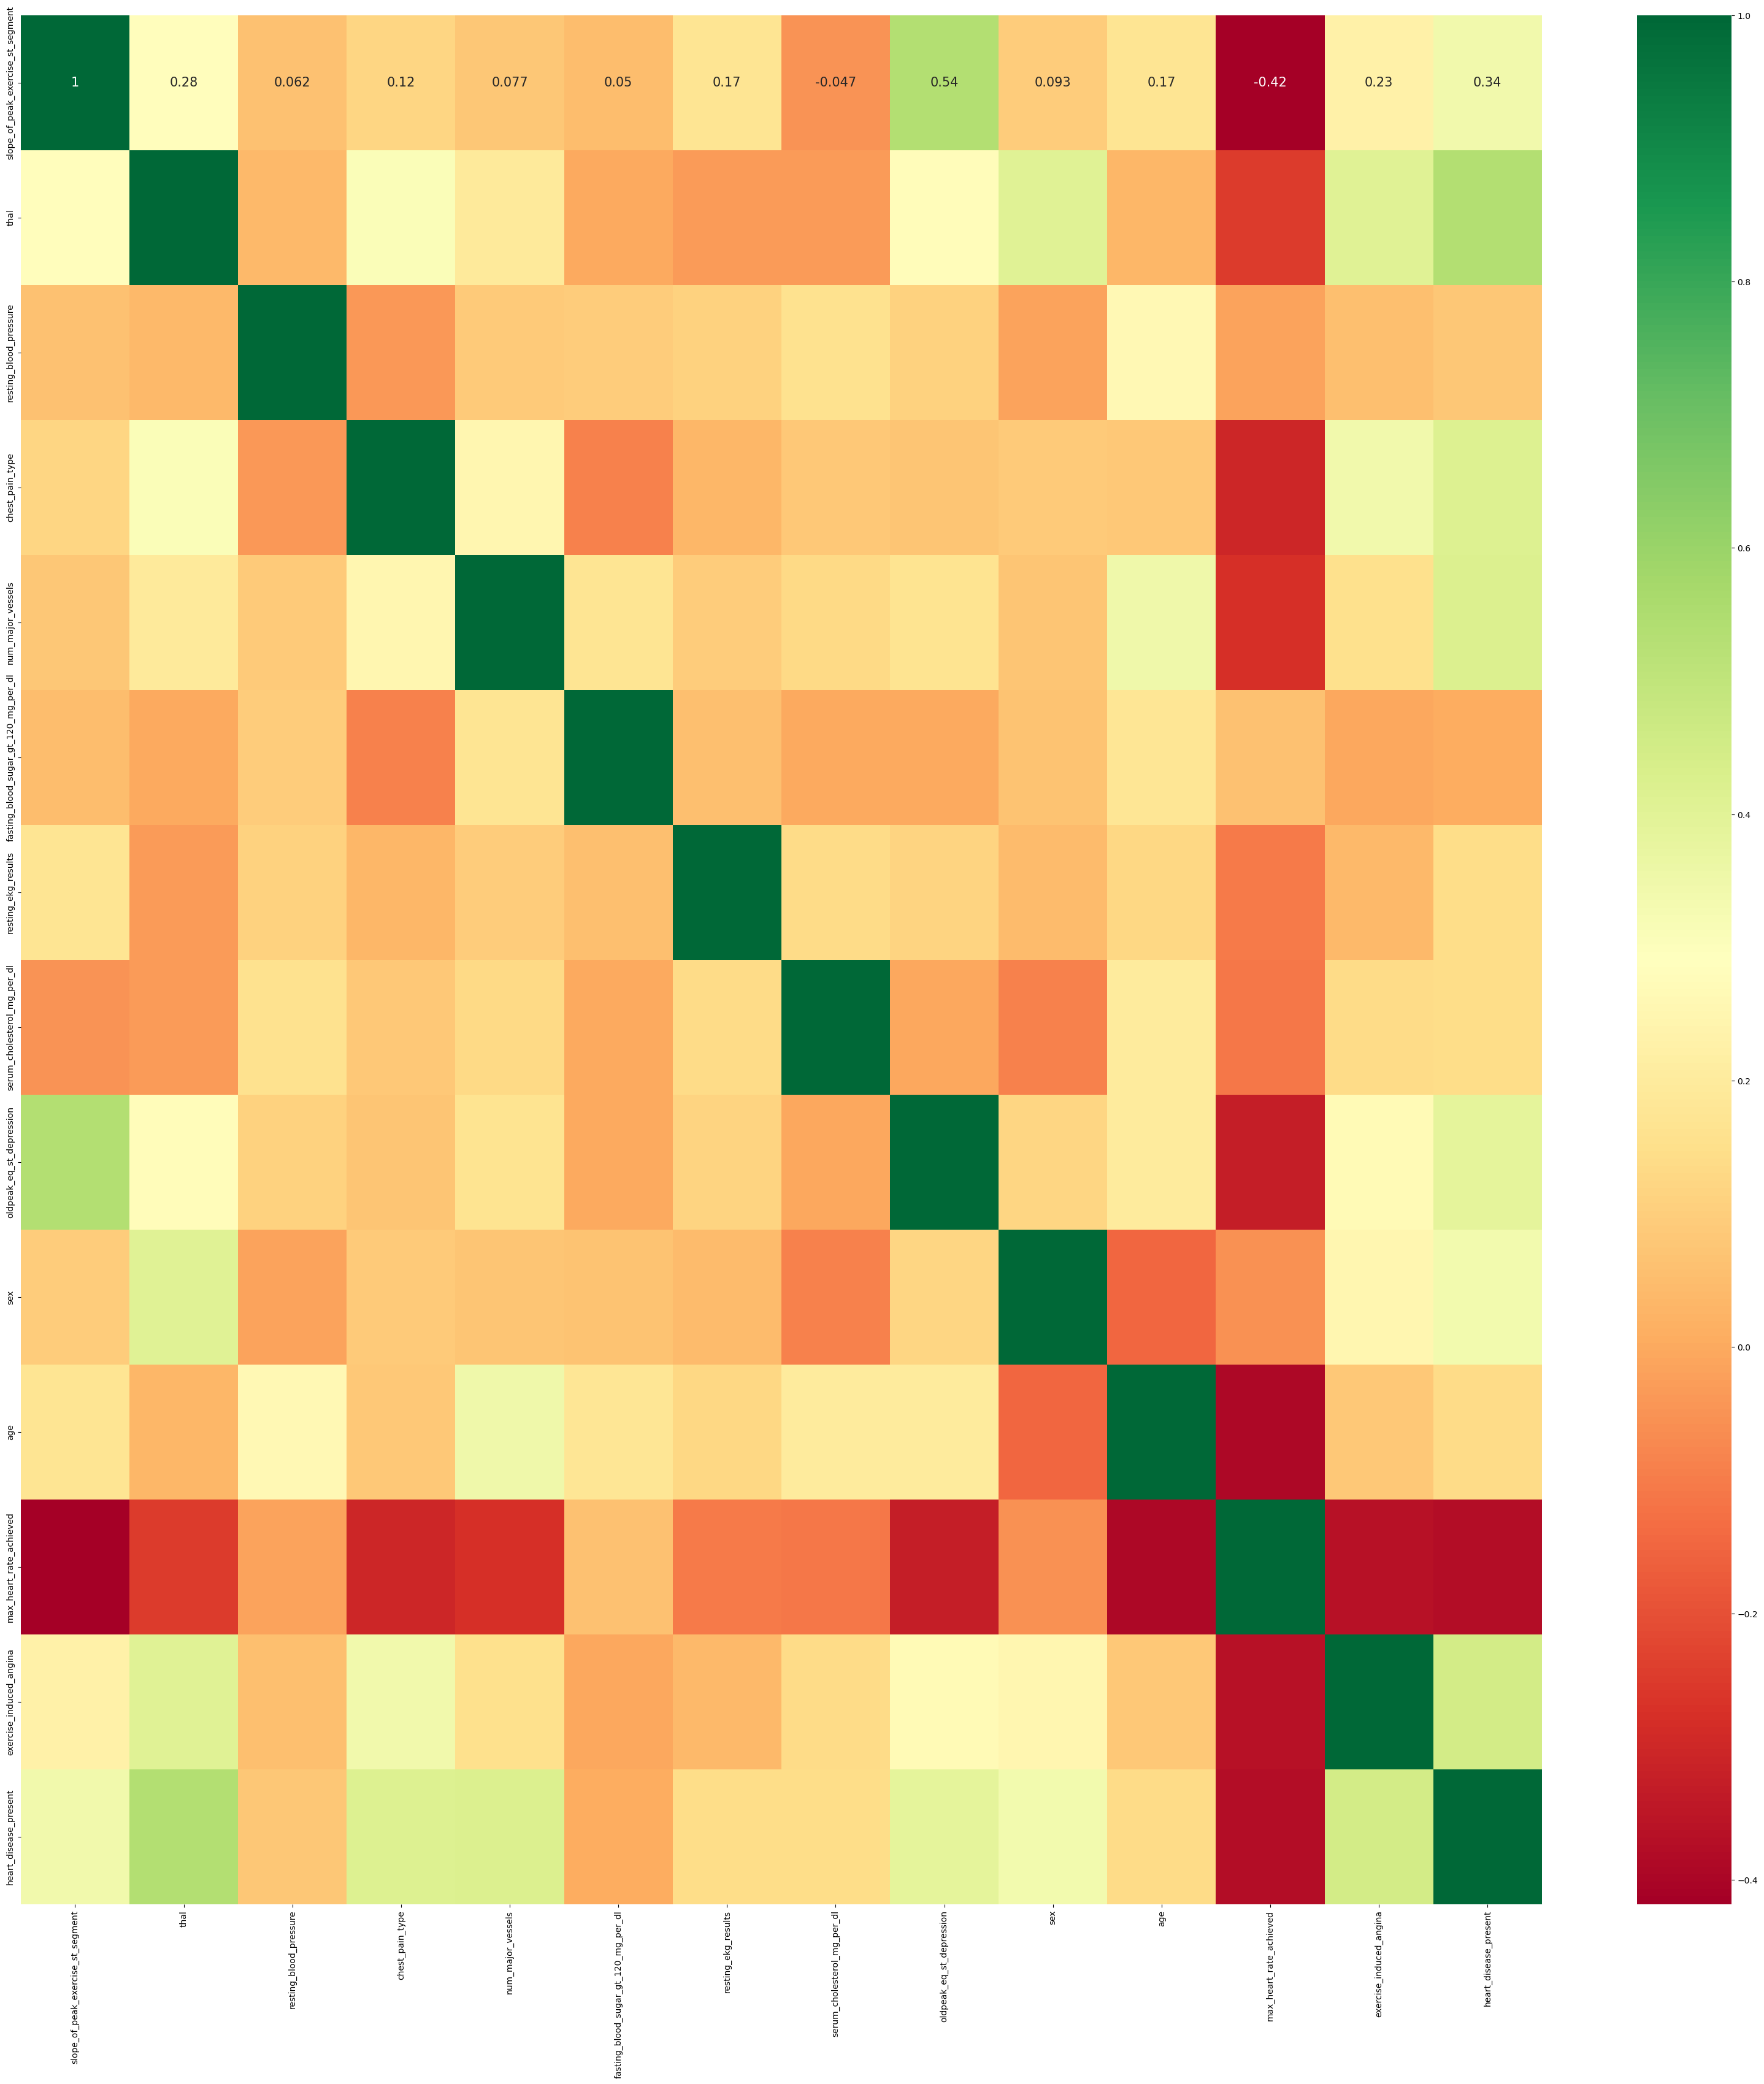

In [54]:

plt.figure(figsize=(40, 40))  # canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})# Get correlation between 'slope_of_peak_exercise_st_segment' and 'oldpeak_eq_st_depression'
correlation = data[['slope_of_peak_exercise_st_segment', 'oldpeak_eq_st_depression']].corr().iloc[0, 1]


## One Hot encoding

In [55]:
import pandas as pd

# Specify columns to one-hot encode
columns_to_encode = ['slope_of_peak_exercise_st_segment', 'thal', 'chest_pain_type', 
                     'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 
                     'resting_ekg_results']

# Perform one-hot encoding only for specified columns
data = pd.get_dummies(data, columns=columns_to_encode)



In [56]:
data.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,...,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,128,308.0,0.0,1,45,170,0,0,True,False,...,False,True,False,False,False,True,False,False,False,True
1,110,214.0,1.6,0,54,158,0,0,False,True,...,False,True,False,False,False,True,False,True,False,False
2,125,304.0,0.0,1,77,162,1,1,True,False,...,True,False,False,False,True,True,False,False,False,True
3,152,223.0,0.0,1,40,181,0,1,True,False,...,True,True,False,False,False,True,False,True,False,False
4,130,270.0,0.8,1,59,145,0,0,False,False,...,False,True,False,False,False,True,False,False,False,True


In [57]:
# Assuming 'data' is your DataFrame
data = data.astype(int)

In [58]:
data.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,...,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,128,308,0,1,45,170,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,110,214,1,0,54,158,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,125,304,0,1,77,162,1,1,1,0,...,1,0,0,0,1,1,0,0,0,1
3,152,223,0,1,40,181,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
4,130,270,0,1,59,145,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


## Applying Log function

In [59]:

# Select columns for which you want to apply the logarithmic function
columns_to_transform = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'age', 'max_heart_rate_achieved']

# Apply logarithmic transformation to selected columns
data[columns_to_transform] = data[columns_to_transform].apply(np.log)

In [60]:
data

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,...,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,4.852030,5.730100,0,1,3.806662,5.135798,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,4.700480,5.365976,1,0,3.988984,5.062595,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,4.828314,5.717028,0,1,4.343805,5.087596,1,1,1,0,...,1,0,0,0,1,1,0,0,0,1
3,5.023881,5.407172,0,1,3.688879,5.198497,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
4,4.867534,5.598422,0,1,4.077537,4.976734,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.828314,5.537334,0,1,4.204693,5.093750,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0
176,4.867534,5.789960,3,0,4.007333,4.762174,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
177,4.828314,5.733341,1,1,4.158883,4.875197,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
178,4.820282,5.541264,0,1,3.871201,5.164786,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0


In [61]:
# Apply one-hot encoding to the specified column
data_encoded = pd.get_dummies(data, columns=['oldpeak_eq_st_depression'])

In [62]:
data

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,...,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,4.852030,5.730100,0,1,3.806662,5.135798,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,4.700480,5.365976,1,0,3.988984,5.062595,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,4.828314,5.717028,0,1,4.343805,5.087596,1,1,1,0,...,1,0,0,0,1,1,0,0,0,1
3,5.023881,5.407172,0,1,3.688879,5.198497,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
4,4.867534,5.598422,0,1,4.077537,4.976734,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.828314,5.537334,0,1,4.204693,5.093750,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0
176,4.867534,5.789960,3,0,4.007333,4.762174,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0
177,4.828314,5.733341,1,1,4.158883,4.875197,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
178,4.820282,5.541264,0,1,3.871201,5.164786,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0


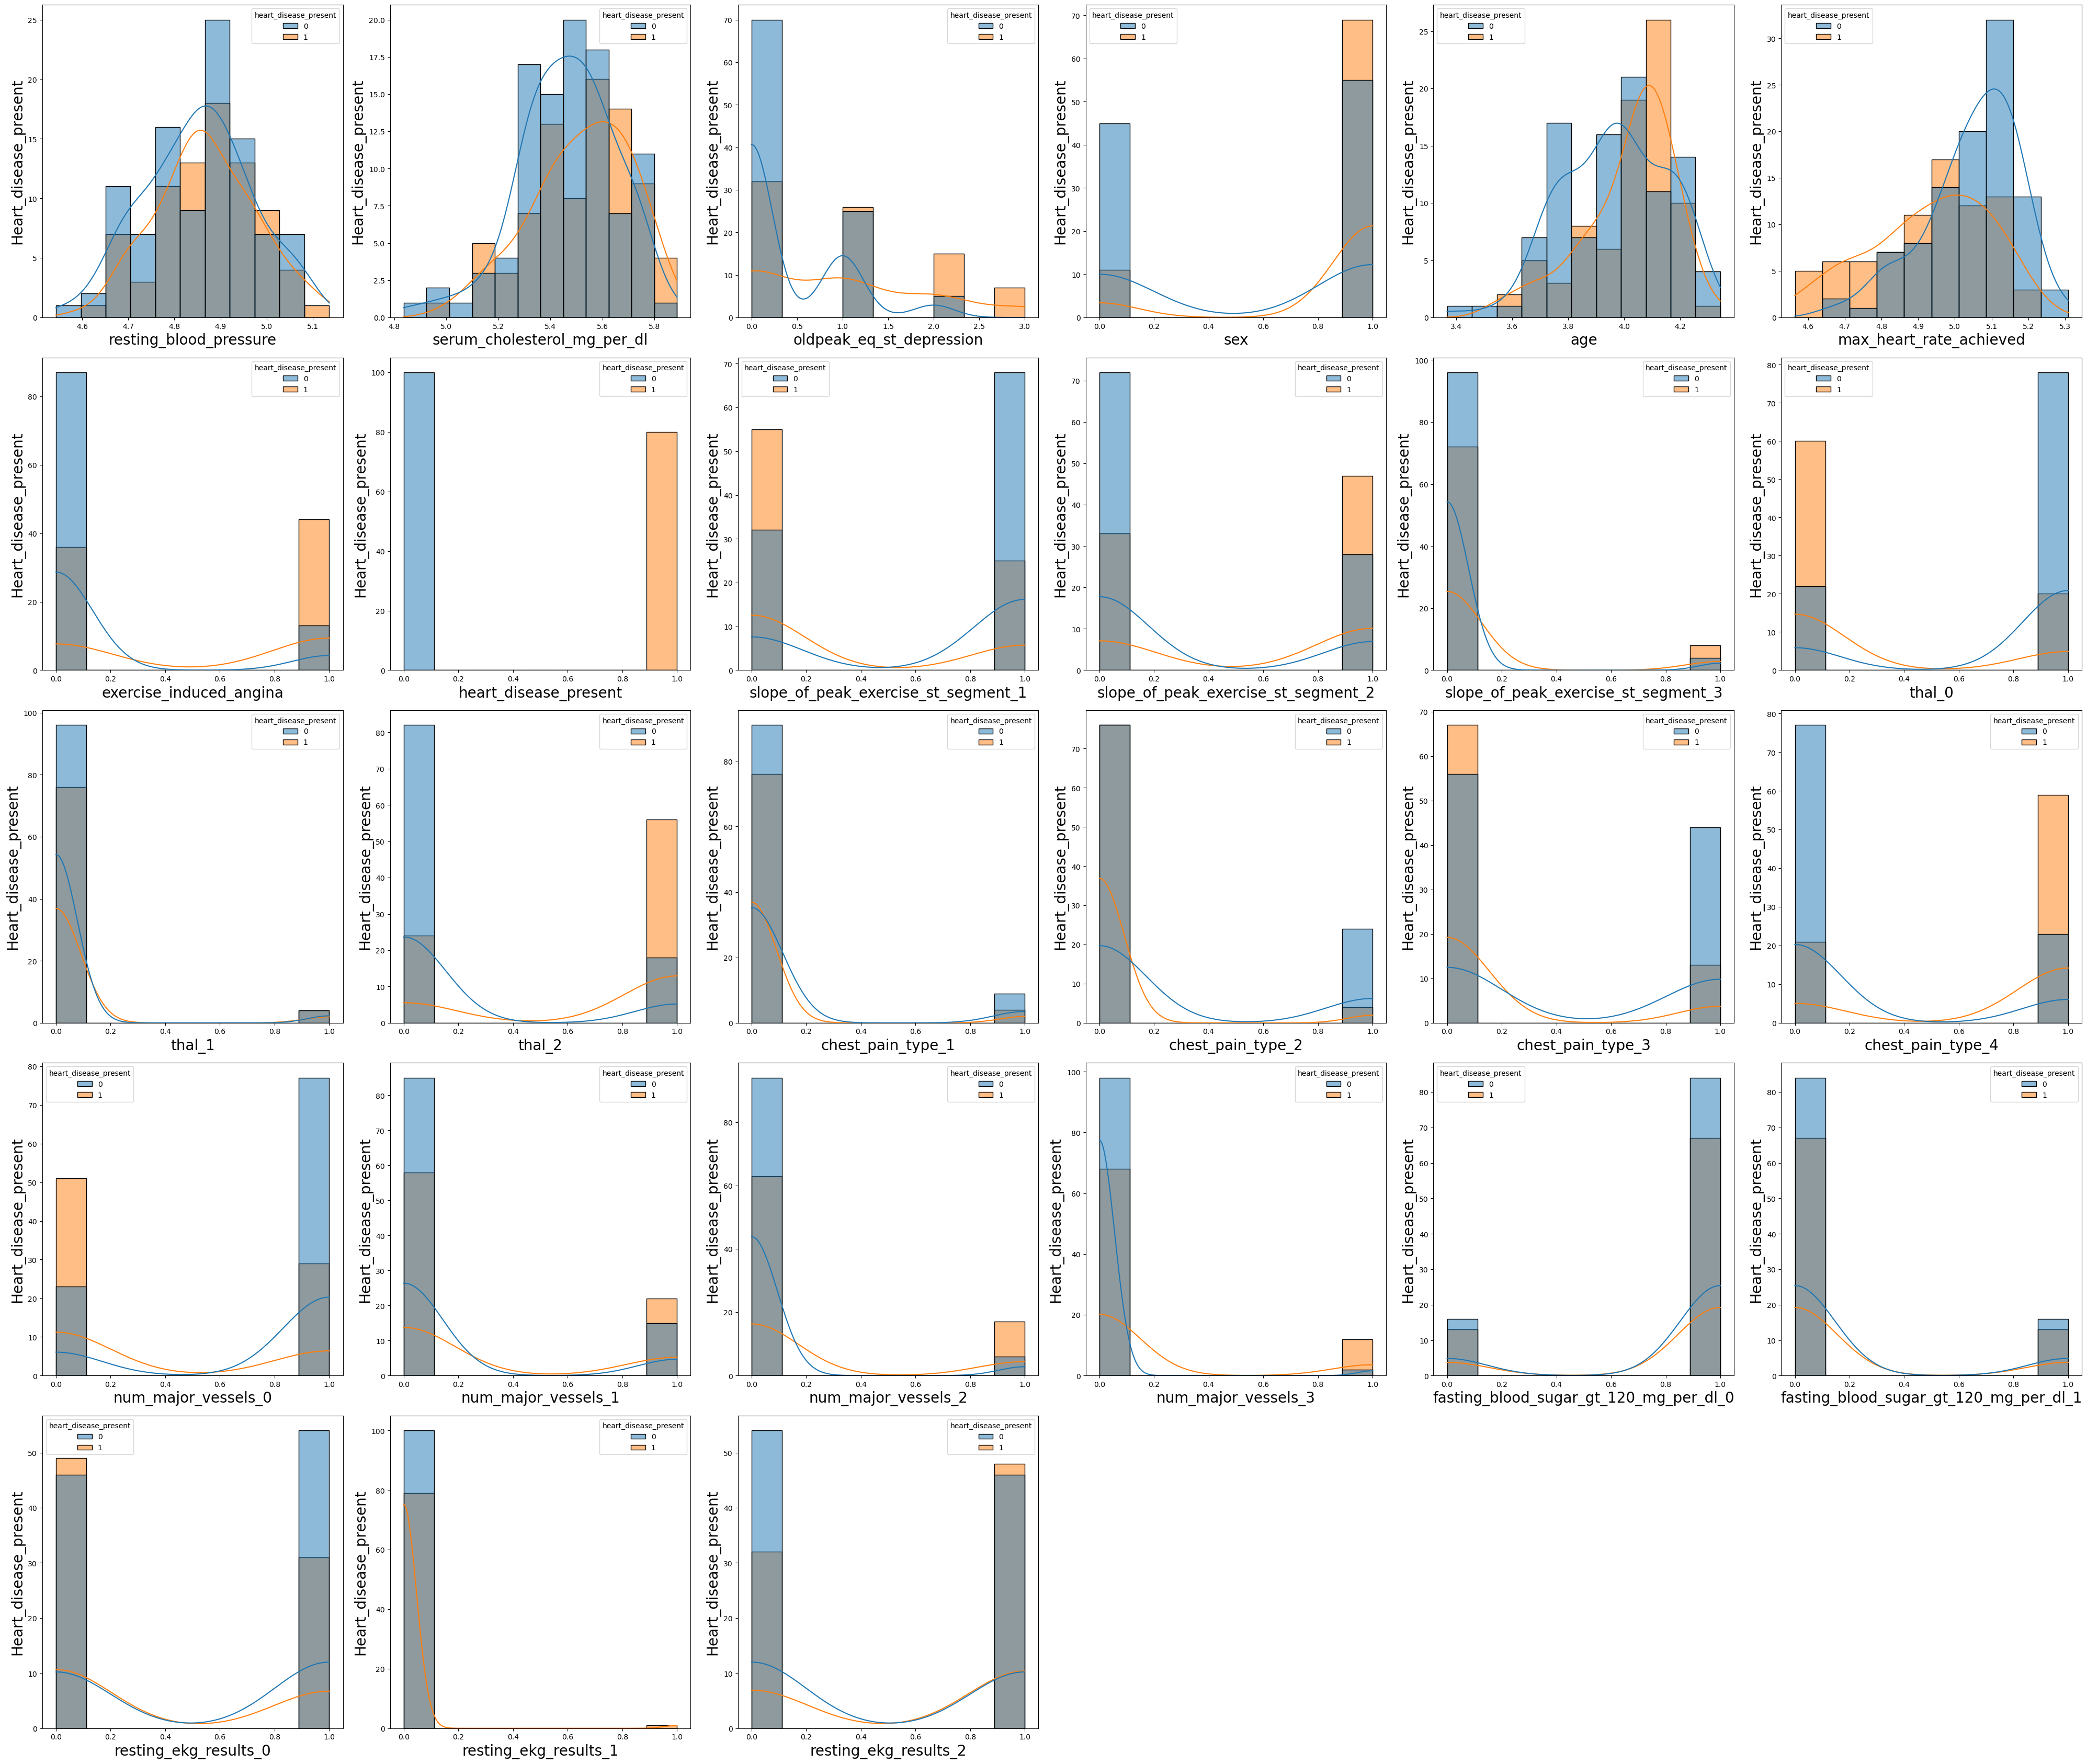

In [63]:
plt.figure(figsize=(40,40))
plotnumber = 1  # Start with subplot number 1

# Loop through each column in the dataset
for column in data.columns:
    ax = plt.subplot(6,6, plotnumber)  # Create subplot
    sns.histplot(x=data[column].dropna(axis=0), hue=data['heart_disease_present'], kde=True, ax=ax)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Heart_disease_present', fontsize=20)
    plotnumber += 1  # Increment subplot number

plt.tight_layout()
plt.show()

In [64]:
# Apply square root transformation to 'age' and 'max_heart_rate_achieved' columns
data['age'] = np.log(data['age'])
data['max_heart_rate_achieved'] = np.cbrt(data['max_heart_rate_achieved'])

<Axes: xlabel='age', ylabel='Count'>

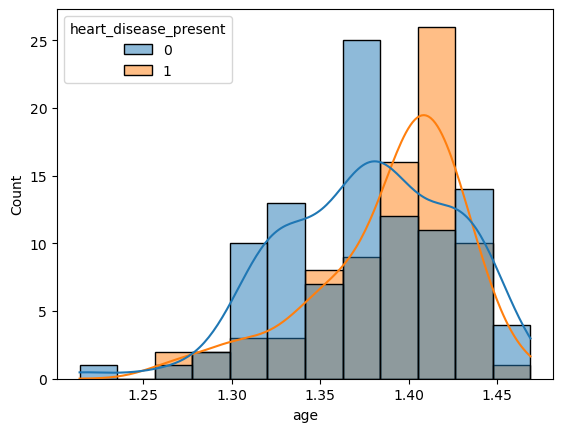

In [65]:
sns.histplot(data=data, x=data.age, hue='heart_disease_present', kde=True)

# model creation

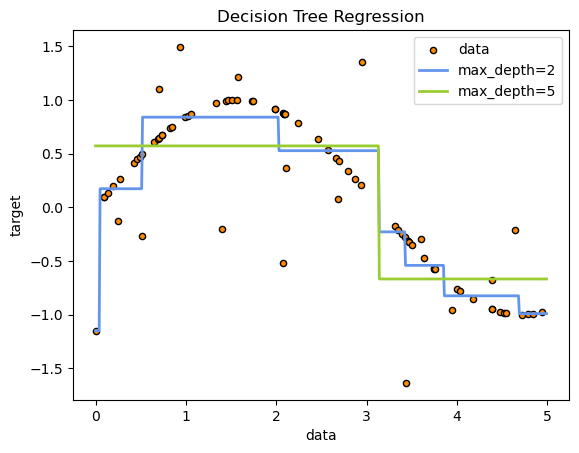

In [66]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=1)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Splitting Data

In [67]:
X = data.drop('heart_disease_present', axis=1)

In [68]:
y = data.heart_disease_present

In [69]:
X.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,...,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,4.852030,5.730100,0,1,1.336753,1.725319,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,4.700480,5.365976,1,0,1.383537,1.717082,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,4.828314,5.717028,0,1,1.468751,1.719904,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
3,5.023881,5.407172,0,1,1.305323,1.732311,0,1,0,0,...,1,1,0,0,0,1,0,1,0,0
4,4.867534,5.598422,0,1,1.405493,1.707320,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [70]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int32

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

-----------------------------------------------------------

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [74]:
x_train_pred = classifier.predict(X_train)
x_test_pred = classifier.predict(X_test)

In [75]:
print('accuracy of training data', accuracy_score(x_train_pred, y_train))
print('accuracy of test data', accuracy_score(x_test_pred, y_test))

accuracy of training data 0.8958333333333334
accuracy of test data 0.8611111111111112


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = pd.crosstab(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


col_0                   0   1
heart_disease_present        
0                      15   1
1                       4  16


0.8611111111111112

In [77]:
# Define logistic regression model
model = LogisticRegression()

# Define hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Evaluate the model on test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters found: {'C': 0.1, 'penalty': 'l2'}
Best score found: 0.8408866995073891
Accuracy on test set: 0.8611111111111112


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



## Bagging with Logistics regression

In [79]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=classifier,n_estimators=400)
model_bagg.fit(X,y)
y_hat_bagg1_test=model_bagg.predict(X_test)
y_hat_bagg1_train = model_bagg.predict(X_train)

### Bagging training data

In [80]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train,y_hat_bagg1_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.66      0.99      0.79        84
           1       0.95      0.30      0.46        60

    accuracy                           0.70       144
   macro avg       0.81      0.64      0.62       144
weighted avg       0.78      0.70      0.65       144



### Bagging testing data

In [81]:
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_hat_bagg1_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        16
           1       1.00      0.30      0.46        20

    accuracy                           0.61        36
   macro avg       0.77      0.65      0.58        36
weighted avg       0.79      0.61      0.57        36



In [82]:

from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier with logistic regression as base learner
gb_lr = GradientBoostingClassifier( n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_lr.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


-----------------------------------------------------------------

# K-NN 

In [83]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
x_train_pred_knn = KNN.predict(X_train)
x_test_pred_knn = KNN.predict(X_test)

In [85]:
print('accuracy of training data', accuracy_score(x_train_pred_knn, y_train))
print('accuracy of test data', accuracy_score(x_test_pred_knn, y_test))

accuracy of training data 0.875
accuracy of test data 0.8333333333333334


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0]
 [ 6 14]]


0.8333333333333334

In [87]:
# Define K-NN model
model = KNeighborsClassifier()

# Define hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Evaluate the model on test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters found: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best score found: 0.84064039408867
Accuracy on test set: 0.8333333333333334


### Bagging for KNN

In [88]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=400)
model_bagg.fit(X,y)
y_hat_bagg1_test_KNN=model_bagg.predict(X_test)
y_hat_bagg1_train_KNN = model_bagg.predict(X_train)

### Bagging for training data

In [89]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train,y_hat_bagg1_train_KNN)
print(report_train)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        84
           1       0.91      0.83      0.87        60

    accuracy                           0.90       144
   macro avg       0.90      0.89      0.89       144
weighted avg       0.90      0.90      0.90       144



### Bagging for testing data

In [90]:
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_hat_bagg1_test_KNN)
print(report_test)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



------------------------------------------------------------------------------

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [92]:
x_train_pred_dt = DT.predict(X_train)
x_test_pred_dt = DT.predict(X_test)
print('accuracy of training data', accuracy_score(x_train_pred_dt, y_train))
print('accuracy of test data', accuracy_score(x_test_pred_dt, y_test))

accuracy of training data 1.0
accuracy of test data 0.7777777777777778


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  1]
 [ 4 16]]


0.8611111111111112

In [94]:
# Define Decision Tree model
model = DecisionTreeClassifier()

# Define hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Evaluate the model on test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score found: 0.7369458128078817
Accuracy on test set: 0.7777777777777778


## Bagging for decision tree

In [95]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=DT,n_estimators=400)
model_bagg.fit(X,y)
y_hat_bagg1_test_DT=model_bagg.predict(X_test)
y_hat_bagg1_train_DT = model_bagg.predict(X_train)

### Bagging for training data

In [96]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train,y_hat_bagg1_train_DT)
print(report_train)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        84
           1       0.86      0.85      0.86        60

    accuracy                           0.88       144
   macro avg       0.88      0.88      0.88       144
weighted avg       0.88      0.88      0.88       144



### Bagging for testing data

In [97]:
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_hat_bagg1_test_DT)
print(report_test)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



-----------------------------------------------------

# Kernel SVM

In [98]:
from sklearn.svm import SVC
KSVM = SVC(kernel = 'rbf', random_state = 0)
KSVM.fit(X_train, y_train)

SVC(random_state=0)

In [99]:
x_train_pred_ksvm = KSVM.predict(X_train)
x_test_pred_ksvm = KSVM.predict(X_test)
print('accuracy of training data', accuracy_score(x_train_pred_ksvm, y_train))
print('accuracy of test data', accuracy_score(x_test_pred_ksvm, y_test))

accuracy of training data 0.9583333333333334
accuracy of test data 0.8888888888888888


In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  1]
 [ 4 16]]


0.8611111111111112

In [101]:
# Define Kernel SVM model
model = SVC()

# Define hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Evaluate the model on test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best score found: 0.833743842364532
Accuracy on test set: 0.8611111111111112


## Bagging for kernel SVM

In [102]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KSVM,n_estimators=400)
model_bagg.fit(X,y)
y_hat_bagg1_test_KSVM=model_bagg.predict(X_test)
y_hat_bagg1_train_KSVM = model_bagg.predict(X_train)

### Bagging for training 

In [103]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train,y_hat_bagg1_train_KSVM)
print(report_train)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        84
           1       0.71      0.92      0.80        60

    accuracy                           0.81       144
   macro avg       0.81      0.82      0.81       144
weighted avg       0.83      0.81      0.81       144



### Bagging for testing

In [104]:
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_hat_bagg1_test_KSVM)
print(report_test)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



-----------------------------------------

# Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [106]:
x_train_pred_nb = NB.predict(X_train)
x_test_pred_nb = NB.predict(X_test)
print('accuracy of training data', accuracy_score(x_train_pred_nb, y_train))
print('accuracy of test data', accuracy_score(x_test_pred_nb, y_test))

accuracy of training data 0.7638888888888888
accuracy of test data 0.7222222222222222


In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  1]
 [ 4 16]]


0.8611111111111112

In [108]:
# Define Gaussian Naive Bayes model
model = GaussianNB()

# No hyperparameters to tune for Gaussian Naive Bayes

# Perform GridSearchCV (in this case, it's not necessary, but included for consistency)
grid_search = GridSearchCV(estimator=model, param_grid={}, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score (since there are no hyperparameters to tune)
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Evaluate the model on test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters found: {}
Best score found: 0.7014778325123153
Accuracy on test set: 0.7222222222222222


## Bagging for Naive Bayes

In [109]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=NB,n_estimators=400)
model_bagg.fit(X,y)
y_hat_bagg1_test_NB=model_bagg.predict(X_test)
y_hat_bagg1_train_NB = model_bagg.predict(X_train)

### Bagging for training data

In [110]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train,y_hat_bagg1_train_NB)
print(report_train)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.42      1.00      0.59        60

    accuracy                           0.42       144
   macro avg       0.21      0.50      0.29       144
weighted avg       0.17      0.42      0.25       144



### Bagging for testing data

In [111]:
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_hat_bagg1_test_NB)
print(report_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.56      1.00      0.71        20

    accuracy                           0.56        36
   macro avg       0.28      0.50      0.36        36
weighted avg       0.31      0.56      0.40        36



----------------------------

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [113]:
x_train_pred_rf = RF.predict(X_train)
x_test_pred_rf = RF.predict(X_test)
print('accuracy of training data', accuracy_score(x_train_pred_rf, y_train))
print('accuracy of test data', accuracy_score(x_test_pred_rf, y_test))

accuracy of training data 0.9861111111111112
accuracy of test data 0.8611111111111112


In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  1]
 [ 4 16]]


0.8611111111111112

In [115]:
# Define Random Forest model
model = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Evaluate the model on test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score found: 0.8546798029556651
Accuracy on test set: 0.8333333333333334


## Bagging for Random forest

In [116]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=RF,n_estimators=400)
model_bagg.fit(X,y)
y_hat_bagg1_test_SVM=model_bagg.predict(X_test)
y_hat_bagg1_train_RF = model_bagg.predict(X_train)

### Bagging for training

In [117]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train,y_hat_bagg1_train_RF)
print(report_train)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        84
           1       0.89      0.90      0.89        60

    accuracy                           0.91       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.91      0.91      0.91       144



### Bagging for testing

In [118]:
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_hat_bagg1_test_SVM)
print(report_test)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.80      0.89        20

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.89        36



-------------------------

# SVM

In [119]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [120]:
x_train_pred_svm = SVM.predict(X_train)
x_test_pred_svm = SVM.predict(X_test)
print('accuracy of training data', accuracy_score(x_train_pred_svm, y_train))
print('accuracy of test data', accuracy_score(x_test_pred_svm, y_test))

accuracy of training data 0.8958333333333334
accuracy of test data 0.8055555555555556


In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  1]
 [ 4 16]]


0.8611111111111112

## Bagging for SVM

In [122]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=SVM,n_estimators=400)
model_bagg.fit(X,y)
y_hat_bagg1_test_SVM=model_bagg.predict(X_test)
y_hat_bagg1_train_SVM = model_bagg.predict(X_train)

### Bagging for training 

In [123]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train,y_hat_bagg1_train_SVM)
print(report_train)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        84
           1       1.00      0.23      0.38        60

    accuracy                           0.68       144
   macro avg       0.82      0.62      0.58       144
weighted avg       0.79      0.68      0.62       144



### Bagging for testing 

In [124]:
from sklearn.metrics import classification_report
report_test = classification_report(y_test,y_hat_bagg1_test_SVM)
print(report_test)

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        16
           1       1.00      0.30      0.46        20

    accuracy                           0.61        36
   macro avg       0.77      0.65      0.58        36
weighted avg       0.79      0.61      0.57        36



-------------------

In [126]:
# Create the DataFrame
data = {
    'Model': [ 'Logistics Regression', 'KNN', 'Decision Tree', 'Kernel SVM', 'Naive Bayes', 'Random Forest', 'SVM'],
    'Score': [0.86, 0.83, 0.86, 0.86, 0.86, 0.86, 0.86],
    'Model using Bagging':[0.61, 0.86, 0.83, 0.86, 0.56, 0.89, 0.61]
}

df = pd.DataFrame(data)


In [127]:
df

,Model,Score,Model using Bagging
0,Logistics Regression,0.86,0.61
1,KNN,0.83,0.86
2,Decision Tree,0.86,0.83
3,Kernel SVM,0.86,0.86
4,Naive Bayes,0.86,0.56
5,Random Forest,0.86,0.89
6,SVM,0.86,0.61
